In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

#from astropy.io import fits
from keckcode_test.keckcode.esiredux import esi2d
from specim_test.specim.specfuncs import spec2d, spec1d, echelle1d

from astropy.modeling import models

In [2]:
file_loc = '../galaxy_spectra/ESI_data/2018/*'

In [3]:
spec2d_file_list = []
var2d_file_list = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'Feige110' in p:
        if 'bgsub.fits' in p:
            spec2d_file_list.append(p)
        elif 'var.fits' in p:
            var2d_file_list.append(p)
            #frame = p.split('_')[-3][:4]
            #out_file.append('0053m1_r'+ frame + '_cleaned.fits')
        #print(p)

In [4]:
spec = esi2d.Esi2d(spec2d_file_list[0], varfile=var2d_file_list[1])
print(spec2d_file_list[0])
print(var2d_file_list[1])

Order  Shape    Dispaxis
----- --------- --------
  1   3461x165     x
  2   4093x145     x
  3   4096x146     x
  4   4096x141     x
  5   4096x130     x
  6   4096x127     x
  7   4096x124     x
  8   4096x121     x
  9   4096x117     x
 10   4096x111     x
../galaxy_spectra/ESI_data/2018/Feige110_0026_bgsub.fits
../galaxy_spectra/ESI_data/2018/Feige110_0026_var.fits


In [5]:
sp = spec[5]

Profile max value (before normalization) 15548.070000


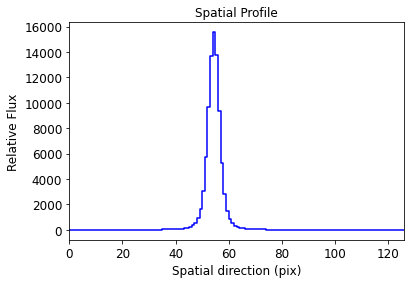

In [6]:
profile = sp.spatial_profile(pixrange=[1800, 2200])


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 1
Number of Moffat profile : 0

Now enter constants of the background polynomial upto degree 0
c0 : 20

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 15500, 55, 3

amplitude=15500.000000, mu=55.000000, sigma=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Polynomial1D(0, c0=43.66564919)>

    [1]: <Gaussian1D(amplitude=15127.69996575, mean=54.96557192, stddev=2.15676337)>
Parameters:
           c0_0          amplitude_1           mean_1           stddev_1    
    ----------------- ------------------ ----------------- -----------------
    43.66564918959175 15127.699965749982 54.965571

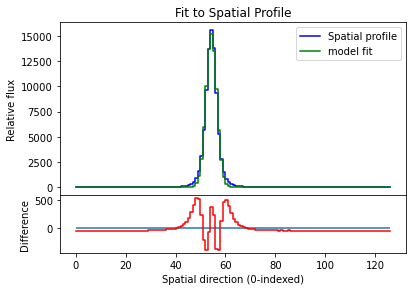

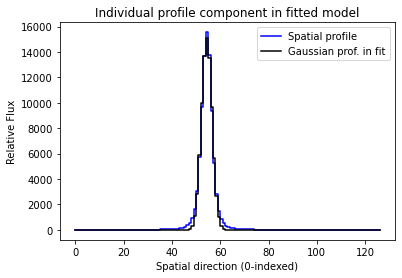


Do you want to start over ? : type yes/no
no


<CompoundModel(c0_0=43.66564919, amplitude_1=15127.69996575, mean_1=54.96557192, stddev_1=2.15676337)>

In [7]:
sp.initial_model()


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 4 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: mean_1
Fitting polynomial of degree 4 to parameter: stddev_1


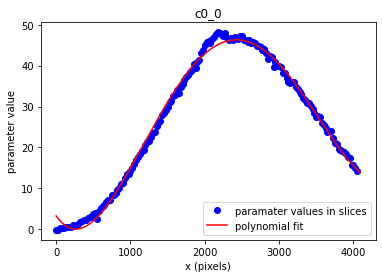

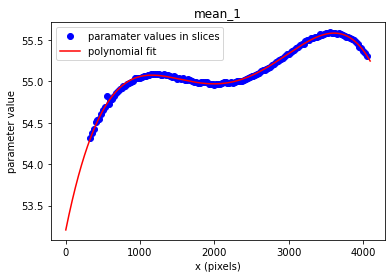

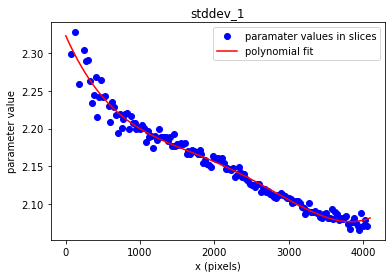

In [8]:
sp.find_and_trace(sp.mod0, stepsize=25, fitorder={'mean_1': 4, 'stddev_1': 4}, polyorder=4)

Fitting to 1 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 900 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5810.63
 Spectrum End:     6560.55
 Dispersion (1st pixel):   0.22
 Dispersion (average):      0.23


Plotting the spectrum


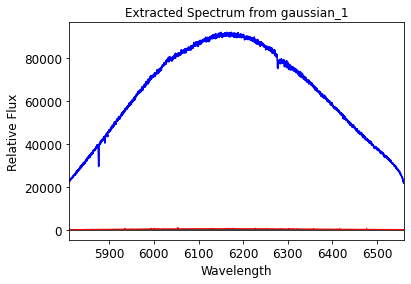

In [9]:
sp.extract(method='modelfit', extrange=[900, 4096])

<IPython.core.display.Javascript object>


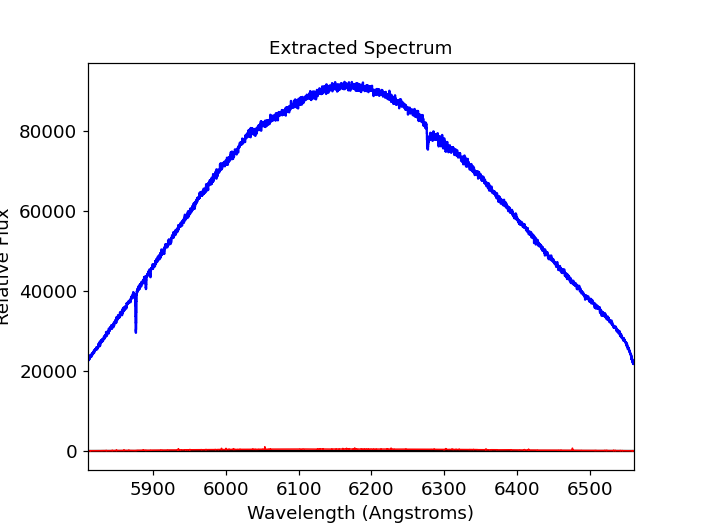

In [22]:
%matplotlib notebook
sp.spectra[0][1].plot(var_spec=False)

In [13]:
sp.parm_tab

c0_0,mean_1,stddev_1
float64,float64,float64
3.26665048791406,53.206661063945326,2.3228587055191823
3.2410883127089107,53.21107599874535,2.3226378355981847
3.2156390194445432,53.21548368434635,2.3224172385105364
3.1903024794433485,53.21988412791392,2.3221969139947505
3.1650785640824757,53.224277336610434,2.321976861789458
3.1399671447938333,53.2286633175951,2.3217570816334057
3.114968093064089,53.23304207802395,2.3215375732654575
3.09008128043467,53.237413625049825,2.321318336424594
3.065306578501761,53.24177796582239,2.3210993708499132


In [38]:
sp.fitpars['c0_0']

0.0

In [14]:
md = models.Gaussian1D(amplitude=np.ones(sp.npix), mean=sp.parm_tab['mean_1'], 
                        stddev=sp.parm_tab['stddev_1'], fixed={'mean': True, 'stddev': True}, 
                       n_models=sp.npix)

In [15]:
y2d, x2d = np.indices(sp.data.shape)

In [16]:
y2d.T

array([[  0,   1,   2, ..., 124, 125, 126],
       [  0,   1,   2, ..., 124, 125, 126],
       [  0,   1,   2, ..., 124, 125, 126],
       ...,
       [  0,   1,   2, ..., 124, 125, 126],
       [  0,   1,   2, ..., 124, 125, 126],
       [  0,   1,   2, ..., 124, 125, 126]])

In [17]:
prof = md(y2d.T).T

In [18]:
prof.shape

(127, 4096)

In [39]:
Pnorm = (prof.sum(axis=sp.spaceaxis))
newdim = (sp.npix, sp.nspat)
Pnorm = Pnorm.repeat(sp.nspat).reshape(newdim).T
profdat = prof/Pnorm

In [26]:
plt.plot(np.arange(sp.nspat), sp.data[:, 3950:3951], label='data')
plt.plot(np.arange(sp.nspat), sp.fitpars['amplitude_1'][3950]*prof[:, 3950:3951], label='model')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


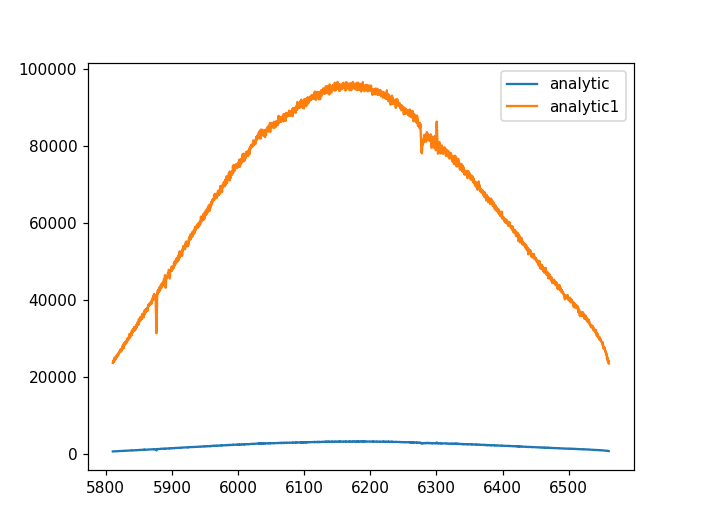

In [41]:
plt.plot(sp.spectra[0][1]['wav'], (1/np.sum(prof**2/ sp.vardata, axis=0))[900:4096], label='analytic')
#plt.plot(sp.spectra[0][1]['wav'], (sp.spectra[0][1]['var']), 
#         label='modelfit')
plt.plot(sp.spectra[0][1]['wav'], (1/np.sum(profdat**2/ sp.vardata, axis=0))[900:4096], label='analytic1')
plt.legend()

In [29]:
sp_op =spec1d.Spec1d('spec_optimal_method.fits', informat='fits')


Reading spectrum from spec_optimal_method.fits
Expected file format: fits
 Spectrum Start:  5810.63
 Spectrum End:     6560.55
 Dispersion (1st pixel):   0.22
 Dispersion (average):      0.23



<IPython.core.display.Javascript object>


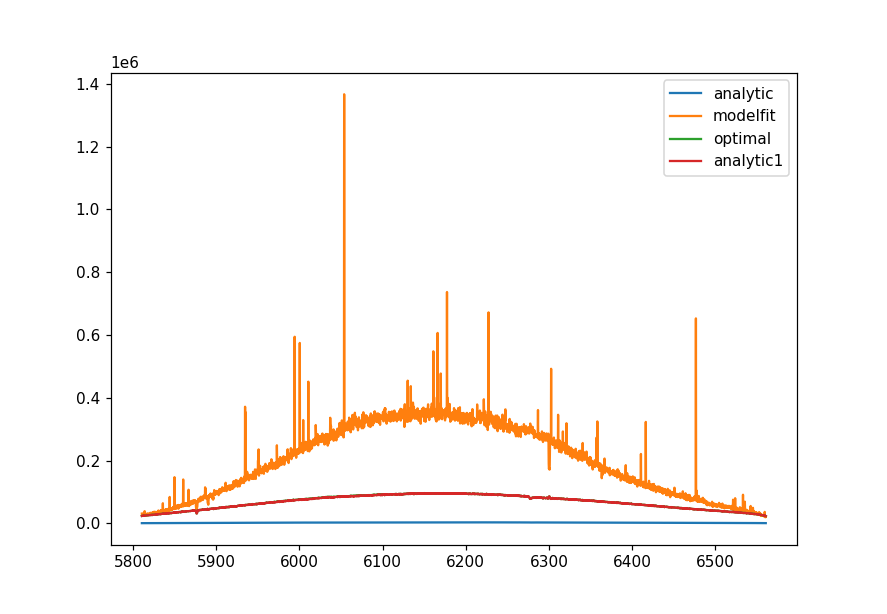

In [52]:
plt.plot(sp.spectra[0][1]['wav'], (1/np.sum(prof**2/ sp.vardata, axis=0))[900:4096], label='analytic')
plt.plot(sp.spectra[0][1]['wav'], (sp.spectra[0][1]['var']), 
         label='modelfit')
plt.plot(sp_op['wav'], sp_op['var'], label='optimal')
plt.plot(sp.spectra[0][1]['wav'], (1/np.sum(profdat**2/ sp.vardata, axis=0))[900:4096], label='analytic1')
plt.legend()

In [51]:
plt.plot(sp_op['wav'], sp_op['var'], label='optimal')
plt.plot(sp.spectra[0][1]['wav'], (1/np.sum(profdat**2/ sp.vardata, axis=0))[900:4096], label='analytic1',
        alpha=0.6)
plt.legend()

<IPython.core.display.Javascript object>

0